In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [3]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df.shape


(150, 5)

In [7]:
print(df['target'])


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


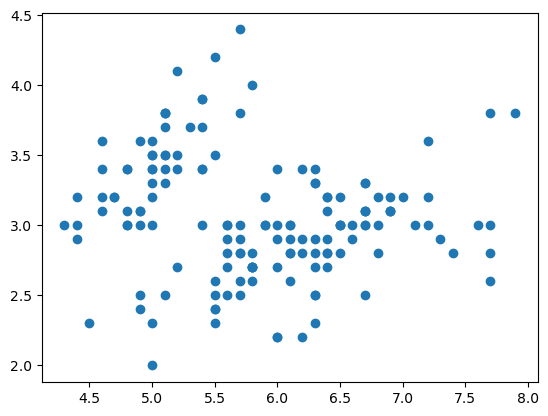

In [8]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.show()

In [9]:
df['Sepal_diff'] = df['sepal length (cm)']-df['sepal width (cm)']
df['petal_diff'] = df['petal length (cm)']-df['petal width (cm)']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Sepal_diff,petal_diff
0,5.1,3.5,1.4,0.2,0,1.6,1.2
1,4.9,3.0,1.4,0.2,0,1.9,1.2
2,4.7,3.2,1.3,0.2,0,1.5,1.1
3,4.6,3.1,1.5,0.2,0,1.5,1.3
4,5.0,3.6,1.4,0.2,0,1.4,1.2


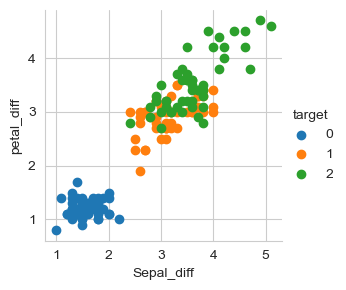

C:\Users\jtaru\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\jtaru\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\jtaru\anaconda3\lib\s

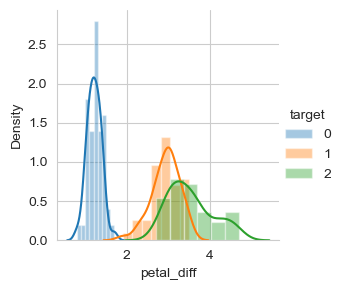

In [10]:
import seaborn as sns

sns.set_style('whitegrid')
sns.FacetGrid(df,hue="target")\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(df,hue="target")\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show() 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
fc = [x for x in df.columns if x!="target"]
x= df[fc]
y= df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state = 100, test_size = 0.30)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [13]:
model1 = DecisionTreeClassifier()


In [14]:
model1.fit(X_train,Y_train)


DecisionTreeClassifier()

In [15]:
Y_pred = model1.predict(X_test)


In [16]:
data2 = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
data2.head()

,Actual,Predicted
128,2,2
11,0,0
118,2,2
15,0,0
123,2,2


In [17]:
accuracy_score(Y_test,Y_pred)


0.9555555555555556

[Text(0.4, 0.9, 'Petal length <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]\nclass = Versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.7, 'Petal width <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]\nclass = Versicolor'),
 Text(0.2, 0.5, 'Petal length <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = Versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Versicolor'),
 Text(0.3, 0.3, 'Sepal length <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(0.8, 0.5, 'Petal length <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]\nclass = Virginica'),
 Text(0.7, 0.3, 'Sepal width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(0.6, 0.1, 'gini 

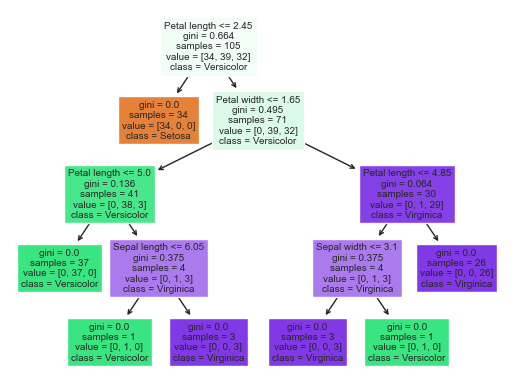

In [18]:
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(model1,feature_names = f_n, class_names = c_n , filled = True)

In [19]:
modelx= DecisionTreeClassifier().fit(x,y)


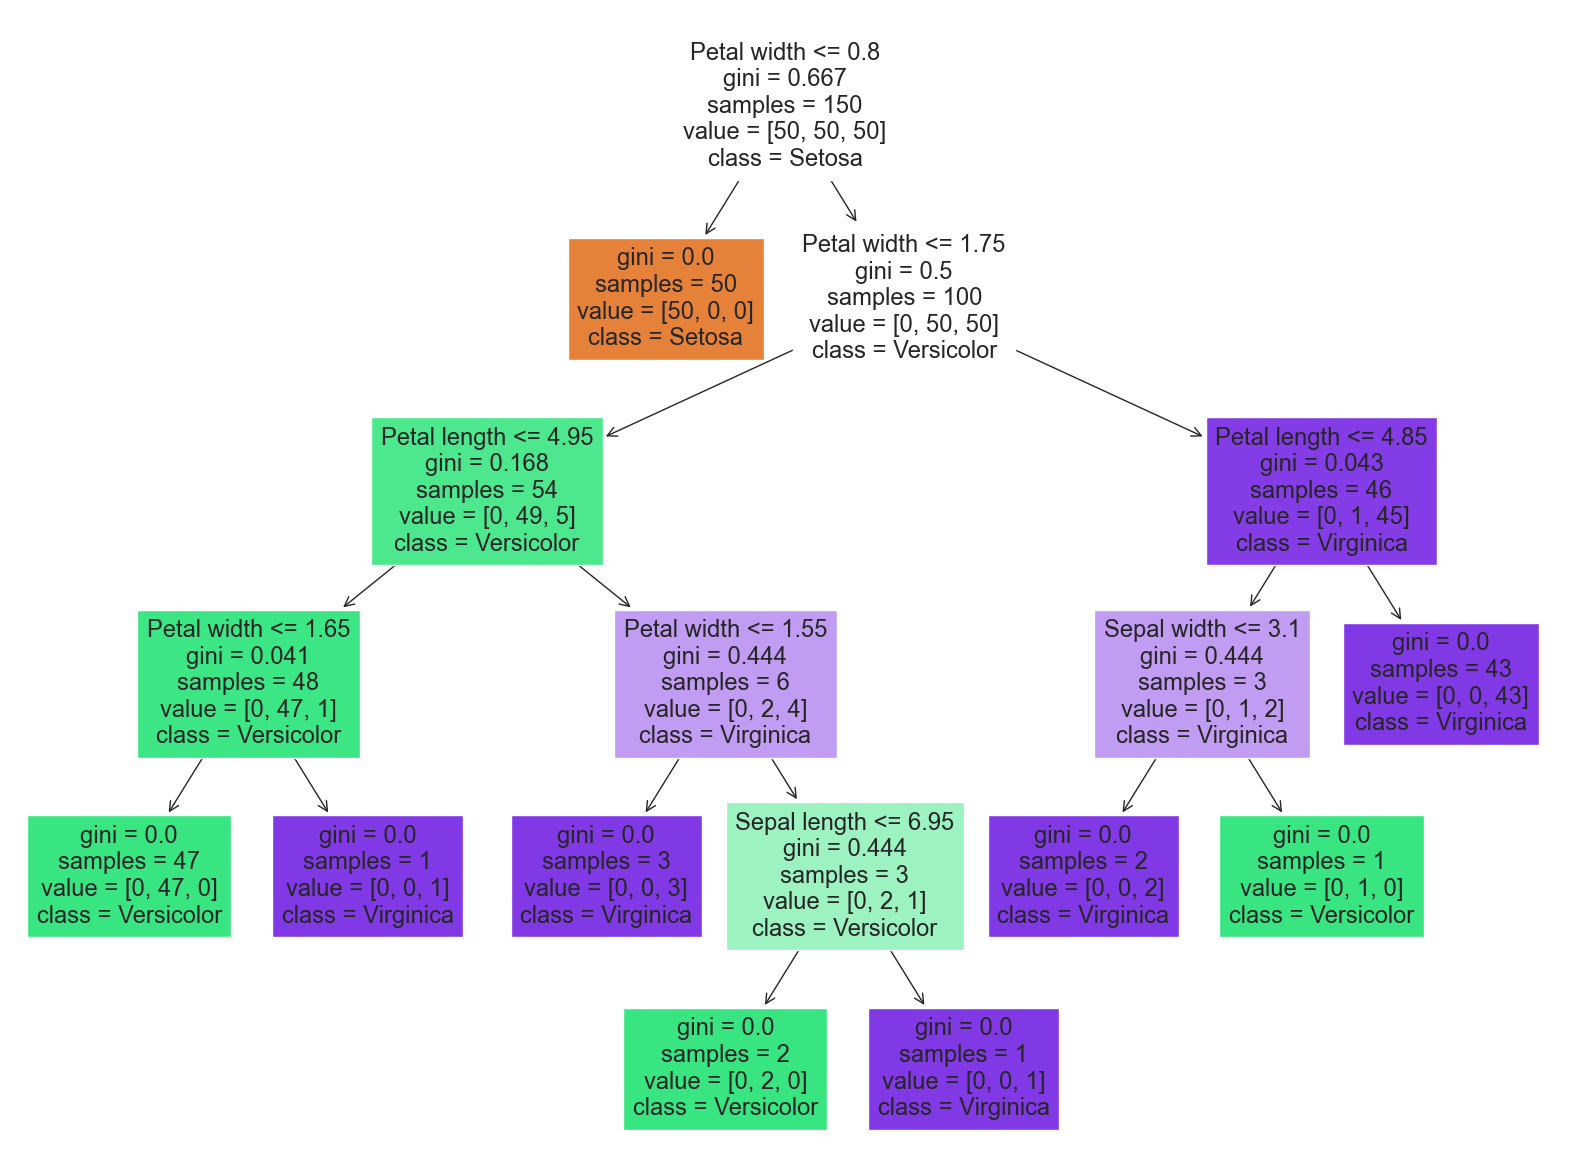

In [20]:
plt.figure(figsize = (20,15))
tree = tree.plot_tree(modelx, feature_names = f_n, class_names = c_n, filled = True)